In [14]:
!git clone https://github.com/Atharva-Malode/ML-Bootcamp.git

fatal: destination path 'ML-Bootcamp' already exists and is not an empty directory.


In [15]:
!pip install pandas numpy seaborn matplotlib pycaret

In [16]:
#IMPORTING ALL NECESSARY LIBRARIES & PACKAGES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from pycaret.classification import *

In [17]:
df = pd.read_csv("/content/ML-Bootcamp/Week-4/Day-1/Dataset/dataset_full.csv")
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [18]:
#summary statistic of dataset
print(df.describe())

        qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
count  88647.000000    88647.000000       88647.000000   88647.000000   
mean       2.191343        0.328810           0.113879       1.281781   
std        1.235636        1.119286           0.657767       1.893929   
min        1.000000        0.000000           0.000000       0.000000   
25%        2.000000        0.000000           0.000000       0.000000   
50%        2.000000        0.000000           0.000000       0.000000   
75%        2.000000        0.000000           0.000000       2.000000   
max       24.000000       35.000000          21.000000      44.000000   

       qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  \
count          88647.000000   88647.000000  88647.000000  88647.000000   
mean               0.009329       0.205861      0.022133      0.140885   
std                0.112568       0.954272      0.279652      0.924864   
min                0.000000       0.000000    

In [19]:
df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

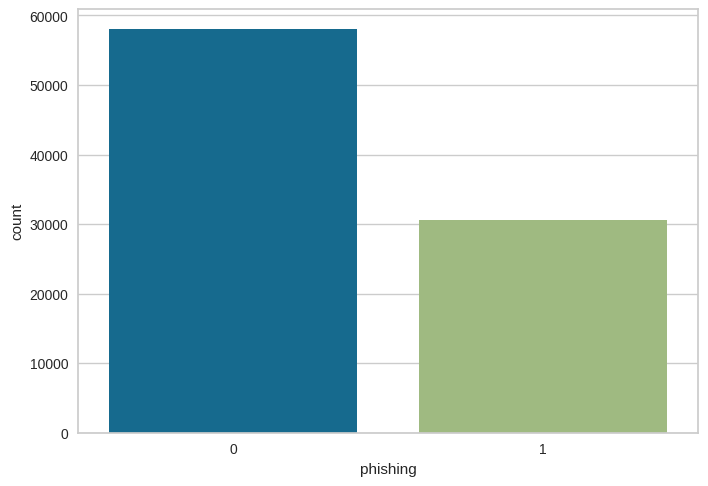

In [20]:
#vizualize the given dataset
sns.countplot(x="phishing",data=df)
plt.show()

In [21]:
cols_to_drop=['url_google_index','domain_google_index','server_client_domain','time_response','domain_spf','qty_ip_resolved','tld_present_params','qty_nameservers','qty_mx_servers','ttl_hostname','url_shortened']
df=df.drop(cols_to_drop,axis=1)

In [24]:
extra_one=['qty_vowels_domain']
df=df.drop(extra_one,axis=1)

In [25]:
rows,columns=df.shape
print("Numbr of rows ",rows)
print("Numbr of columns ",columns)

Numbr of rows  88647
Numbr of columns  100


# perform feature engineering on our dataset and will show it

In [26]:


original_features = list(df.columns)

In [27]:
original_features

['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_questionmark_url',
 'qty_equal_url',
 'qty_at_url',
 'qty_and_url',
 'qty_exclamation_url',
 'qty_space_url',
 'qty_tilde_url',
 'qty_comma_url',
 'qty_plus_url',
 'qty_asterisk_url',
 'qty_hashtag_url',
 'qty_dollar_url',
 'qty_percent_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_hyphen_domain',
 'qty_underline_domain',
 'qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_at_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain',
 'domain_length',
 'domain_in_ip',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_directory',
 'qty_exclamation_directory',
 'qty_sp

In [28]:
dataset_array=np.array(df)

In [29]:
print(dataset_array)

[[3 0 0 ... 0 0 1]
 [5 0 1 ... 1 0 1]
 [2 0 0 ... 1 0 0]
 ...
 [2 1 0 ... 1 0 1]
 [2 0 0 ... 1 0 1]
 [2 0 0 ... 0 0 0]]


In [30]:
features_indices=[]
attributes=['url','domain','file','params']

In [32]:
new_dataset={}

In [33]:
for index,name in enumerate(original_features):
  if 'qty' in name and name.split('_')[-1] in attributes:
    features_indices.append([index,name.split('_')[-1]])
  else:
    new_dataset[name]=dataset_array[:,index]

In [37]:


for index, attribute in features_indices:

  if attribute == 'domain':

    if f"qty_char_{attribute}" not in new_dataset.keys():

        new_dataset[f"qty_char_{attribute}"] = np.zeros(rows)

    new_dataset[f"qty_char_{attribute}"] += dataset_array[:,index]

In [38]:
df1 = pd.DataFrame(new_dataset).astype(int)

In [39]:
df1[df1<-1] = -1
df1

,length_url,domain_length,domain_in_ip,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,...,params_length,email_in_url,asn_ip,time_domain_activation,time_domain_expiration,tls_ssl_certificate,qty_redirects,phishing,qty_chardomain,qty_char_domain
0,25,17,0,1,0,0,1,0,0,0,...,-1,0,60781,-1,-1,0,0,1,0,2
1,223,16,0,3,0,0,3,0,0,0,...,165,0,36024,579,150,1,0,1,0,2
2,15,14,0,0,0,0,1,0,0,0,...,-1,0,4766,-1,-1,1,0,0,0,2
3,81,19,0,2,0,2,5,0,0,0,...,-1,0,20454,-1,-1,1,0,1,0,2
4,19,19,0,-1,-1,-1,-1,-1,-1,-1,...,-1,0,53831,6998,306,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,23,23,0,-1,-1,-1,-1,-1,-1,-1,...,-1,0,8560,5509,334,0,0,0,0,4
88643,34,34,0,-1,-1,-1,-1,-1,-1,-1,...,-1,0,26496,5046,431,0,2,0,0,2
88644,70,22,0,1,1,0,5,0,0,0,...,-1,0,394695,1844,712,1,0,1,0,1
88645,28,27,0,0,0,0,1,0,0,0,...,-1,0,47583,-1,-1,1,0,1,0,2


In [40]:
df1.describe()

,length_url,domain_length,domain_in_ip,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,...,params_length,email_in_url,asn_ip,time_domain_activation,time_domain_expiration,tls_ssl_certificate,qty_redirects,phishing,qty_chardomain,qty_char_domain
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.0,88647.000000
mean,36.347615,18.560820,0.002267,-0.323666,-0.360813,-0.477997,0.713685,-0.535935,-0.528343,-0.532550,...,5.273185,0.018331,31131.152763,3389.676661,352.043250,0.506447,0.343903,0.345720,0.0,1.985967
std,46.191590,6.598694,0.047564,0.899499,1.101398,0.682409,2.216137,0.498710,0.517986,0.551786,...,34.937007,0.134147,45261.502645,3044.165723,598.264801,0.499961,0.783892,0.475605,0.0,0.836865
min,4.000000,4.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.0,0.000000
25%,17.000000,14.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,0.000000,13335.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.0,2.000000
50%,22.000000,18.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,0.000000,20013.000000,3046.000000,168.000000,1.000000,0.000000,0.000000,0.0,2.000000
75%,38.000000,22.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,34922.000000,6423.000000,354.000000,1.000000,1.000000,1.000000,0.0,2.000000
max,4165.000000,231.000000,1.000000,19.000000,23.000000,17.000000,22.000000,0.000000,5.000000,43.000000,...,4094.000000,1.000000,395754.000000,17775.000000,22574.000000,1.000000,17.000000,1.000000,0.0,30.000000


In [41]:
setup(data=df1,target='phishing')

,Description,Value
0,Session id,2775
1,Target,phishing
2,Target type,Binary
3,Original data shape,"(88647, 32)"
4,Transformed data shape,"(88647, 32)"
5,Transformed train set shape,"(62052, 32)"
6,Transformed test set shape,"(26595, 32)"
7,Numeric features,31
8,Preprocess,True
9,Imputation type,simple


In [43]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9652,0.9934,0.9513,0.9483,0.9498,0.9232,0.9232,10.5330
rf,Random Forest Classifier,0.9636,0.9922,0.9532,0.9422,0.9476,0.9197,0.9198,6.7130
et,Extra Trees Classifier,0.9626,0.9902,0.9512,0.9413,0.9462,0.9175,0.9176,6.5600
lightgbm,Light Gradient Boosting Machine,0.9603,0.9923,0.9454,0.9402,0.9428,0.9124,0.9124,1.4610
dt,Decision Tree Classifier,0.9490,0.9436,0.9218,0.9302,0.9260,0.8871,0.8872,0.6760
gbc,Gradient Boosting Classifier,0.9471,0.9872,0.9287,0.9192,0.9239,0.8834,0.8834,10.0260
ada,Ada Boost Classifier,0.9280,0.9811,0.8892,0.9013,0.8952,0.8404,0.8405,2.8940
lr,Logistic Regression,0.9108,0.9661,0.9028,0.8495,0.8747,0.8056,0.8072,4.6980
ridge,Ridge Classifier,0.9031,0.0000,0.9536,0.8030,0.8718,0.7948,0.8025,0.1520
lda,Linear Discriminant Analysis,0.9022,0.9701,0.9542,0.8011,0.8710,0.7933,0.8012,0.4880


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [44]:
tune_model=tune_model(best_model,n_iter=1, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9325,0.9928,0.9884,0.8433,0.9101,0.8566,0.8635
1,0.9294,0.9926,0.9865,0.8381,0.9063,0.8503,0.8575
2,0.9318,0.9935,0.9874,0.8425,0.9092,0.8552,0.8621
3,0.9301,0.9943,0.9907,0.8369,0.9073,0.8518,0.8596
4,0.9260,0.9930,0.9860,0.8314,0.9021,0.8434,0.8513
5,0.9368,0.9942,0.9888,0.8521,0.9154,0.8654,0.8715
6,0.9354,0.9937,0.9888,0.8491,0.9136,0.8625,0.8689
7,0.9359,0.9930,0.9851,0.8524,0.9139,0.8632,0.8690
8,0.9291,0.9935,0.9879,0.8366,0.9059,0.8497,0.8572


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1 candidates, totalling 10 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [48]:
predictions = predict_model(tune_model, data=df1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9737,0.9962,0.9623,0.9617,0.9620,0.9419,0.9419
